Zoher Ghadyali

Data Science Spring 2016

CYOA Project

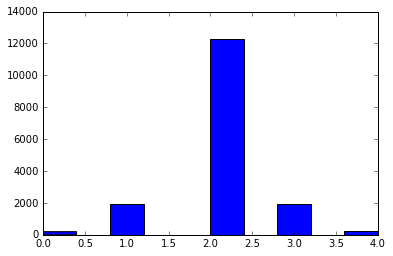

0 0.0119170044159
1 0.115842961708
2 0.742786280322
3 0.116145423749
4 0.0133083298046


In [78]:
import pandas as pd
from matplotlib import pyplot as plt

train_df = pd.read_table('train.tsv')
train_df["containsSpaces"] = train_df["Phrase"].apply(lambda x: ' ' in x)
sw = train_df[train_df.containsSpaces == False]

%matplotlib inline

plt.hist(sw.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(sw[sw.Sentiment == i]) / float(len(sw))

In [3]:
sw_dict = sw.set_index('Phrase')['Sentiment'].to_dict()

#okay so lets go through the single words in the train data set, look for the them in this dict, and assign them this
#sentiment or move on

def get_sentiment_single_word(word):
    if word in sw_dict:
        return sw_dict[word]
    else:
        return 2

def get_sentiment_phrase(phrase):
    phrase_sentiment = []
    for word in phrase.split():
        phrase_sentiment.append(get_sentiment_single_word(word))
    if len(phrase_sentiment):
        return int(sum(phrase_sentiment)/len(phrase_sentiment))
    else:
        return 2

train_df["calcSentiment"] = train_df["Phrase"].apply(get_sentiment_phrase)
row_ids = train_df[train_df.Sentiment != train_df.calcSentiment].index
print len(row_ids)

70410


In [4]:
print len(train_df)

156060


In [5]:
print (float(len(row_ids))/len(train_df)) * 100

45.1172625913


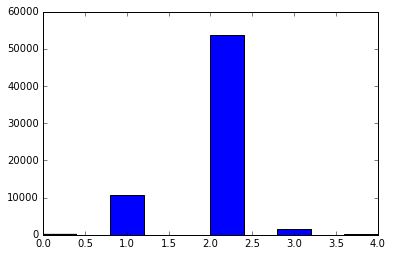

0 0.0017649188439
1 0.161301514512
2 0.811002835938
3 0.0238641163338
4 0.00206661437277


In [6]:
test_df = pd.read_table('test.tsv')

test_df["Sentiment"] = test_df["Phrase"].apply(get_sentiment_phrase)
output = test_df[['PhraseId', 'Sentiment']]

plt.hist(output.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(output[output.Sentiment == i]) / float(len(output))

output.to_csv( "ZG_rotten_tomatoes_4.csv", index=False, quoting=3 )

this got a kaggle score of 0.56008 so now let's do something smarter than just averaging the sentiments of each sentence

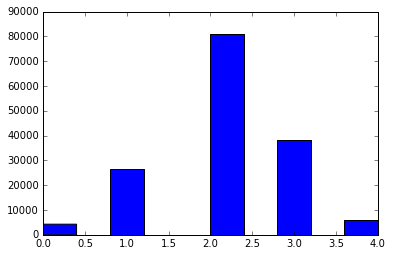

0 0.0274445726003
1 0.169883378188
2 0.519716775599
3 0.244950660003
4 0.0380046136101
Number wrong 69969
Percentage wrong 44.8346789696


In [7]:
train_df = pd.read_table('train.tsv')

def get_sentiment_phrase2(phrase):
    phrase_sentiment = []
    for word in phrase.split():
        word_sentiment = get_sentiment_single_word(word)
        if word_sentiment > 2 or word_sentiment < 2:
            phrase_sentiment.append(word_sentiment)
    if len(phrase_sentiment):
        return int(sum(phrase_sentiment)/len(phrase_sentiment))
    else:
        return 2

train_df["calcSentiment"] = train_df["Phrase"].apply(get_sentiment_phrase2)

plt.hist(train_df.calcSentiment)
plt.show()
for i in range(0, 5):
    print i, len(train_df[train_df.calcSentiment == i]) / float(len(train_df))
    
row_ids = train_df[train_df.Sentiment != train_df.calcSentiment].index
print "Number wrong", len(row_ids)
print "Percentage wrong", (float(len(row_ids))/len(train_df)) * 100

So on our training data we have a 0.28% improvement in accuracy

In [8]:
45.11 - 44.83

0.28000000000000114

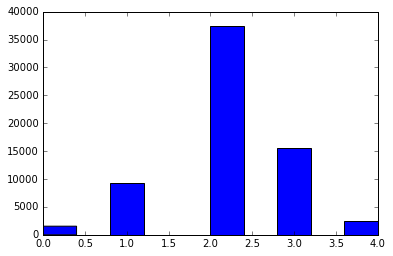

0 0.0232908948289
1 0.139775538527
2 0.564577927955
3 0.235971157907
4 0.036384480782


In [9]:
test_df = pd.read_table('test.tsv')

test_df["Sentiment"] = test_df["Phrase"].apply(get_sentiment_phrase2)
output = test_df[['PhraseId', 'Sentiment']]

plt.hist(output.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(output[output.Sentiment == i]) / float(len(output))

output.to_csv( "ZG_rotten_tomatoes_5.csv", index=False, quoting=3 )

kaggle score of 0.55836

In [84]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


non_sw = train_df[train_df.containsSpaces == True]


def review_to_words( word ):
    letters_only = re.sub("[^a-zA-Z]", " ", word) 
    word = letters_only.lower()
    return word


non_sw.Phrase = non_sw.Phrase.apply(review_to_words)

vectorizer = TfidfVectorizer()
vectorizer.fit(non_sw.Phrase)

vocab = vectorizer.get_feature_names()

X = vectorizer.transform(non_sw.Phrase)
y = non_sw.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.60736759119902528

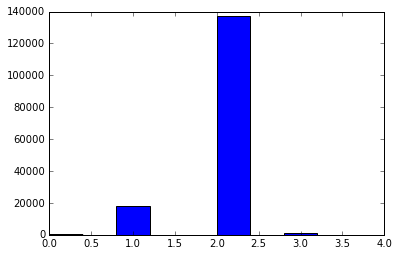

0 0.000173010380623
1 0.114648212226
2 0.87785467128
3 0.00703575547866
4 0.000288350634371
Number wrong 71082
Percentage wrong 45.5478662053


In [95]:
model.fit(vectorizer.transform(non_sw.Phrase), non_sw.Sentiment)
vocab_dict = dict(zip(vocab, model.predict(vectorizer.transform(vocab))))

train_df = pd.read_table('train.tsv')

def get_sentiment_single_word(word):
    if word in vocab_dict:
        return vocab_dict[word]
    else:
        return 2

def get_sentiment_phrase(phrase):
    phrase_sentiment = []
    for word in phrase.split():
        phrase_sentiment.append(get_sentiment_single_word(word))
    if len(phrase_sentiment):
        return int(sum(phrase_sentiment)/len(phrase_sentiment))
    else:
        return 2
                  

train_df["calcSentiment"] = train_df["Phrase"].apply(get_sentiment_phrase)

plt.hist(train_df.calcSentiment)
plt.show()
for i in range(0, 5):
    print i, len(train_df[train_df.calcSentiment == i]) / float(len(train_df))
    
row_ids = train_df[train_df.Sentiment != train_df.calcSentiment].index
print "Number wrong", len(row_ids)
print "Percentage wrong", (float(len(row_ids))/len(train_df)) * 100

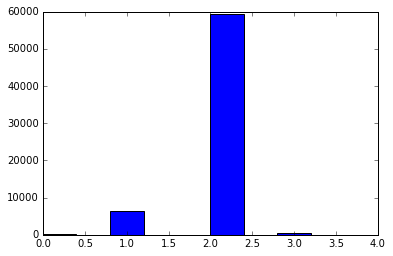

0 0.000316780305316
1 0.0960447716165
2 0.893848428166
3 0.00923188318349
4 0.000558136728414


In [96]:
test_df = pd.read_table('test.tsv')

test_df["Sentiment"] = test_df["Phrase"].apply(get_sentiment_phrase)

output = test_df[['PhraseId', 'Sentiment']]

plt.hist(output.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(output[output.Sentiment == i]) / float(len(output))

output.to_csv("ZG_rotten_tomatoes_5.csv", index=False, quoting=3 )

In [76]:
test_sw_dict = test_sw.set_index('Phrase')['Sentiment'].to_dict()

'i like to eat butts'

{u'unimaginative': 1,
 u'writings': 2,
 u'telanovela': 2,
 u'ryoko': 2,
 u'foul': 1,
 u'pony': 1,
 u'four': 2,
 u'woods': 2,
 u'clotted': 2,
 u'hanging': 2,
 u'conjuring': 2,
 u'woody': 2,
 u'genre': 2,
 u'comically': 2,
 u'conjure': 2,
 u'crooned': 2,
 u'hennings': 2,
 u'pardon': 2,
 u'unanswered': 2,
 u'originality': 3,
 u'superficially': 1,
 u'stevenon': 2,
 u'xtc': 2,
 u'lore': 2,
 u'lord': 2,
 u'immature': 1,
 u'retail': 2,
 u'pierce': 2,
 u'yellow': 2,
 u'bringing': 2,
 u'picaresque': 2,
 u'disturb': 2,
 u'grueling': 2,
 u'provide': 2,
 u'wooden': 1,
 u'voyeur': 2,
 u'wednesday': 2,
 u'peerlessly': 2,
 u'standout': 2,
 u'geeked': 2,
 u'stereotypical': 2,
 u'howlingly': 2,
 u'straight': 2,
 u'elegy': 2,
 u'sprung': 3,
 u'sturm': 2,
 u'insular': 2,
 u'miller': 2,
 u'bacon': 2,
 u'pulse': 2,
 u'elegant': 3,
 u'second': 2,
 u'crisply': 2,
 u'valiant': 2,
 u'shrugging': 2,
 u'sterile': 2,
 u'quite': 2,
 u'hilariously': 2,
 u'errors': 2,
 u'reopens': 2,
 u'ruthless': 2,
 u'stars': 2,
 